<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/svm/VD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

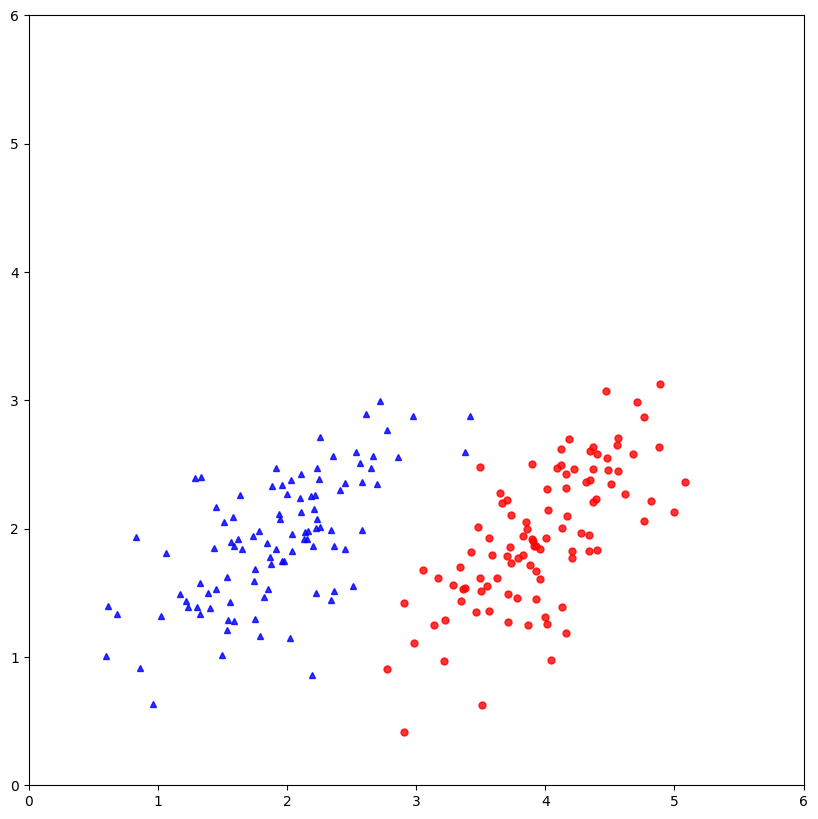

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

In [3]:
#!pip install cvxopt
from cvxopt import matrix, solvers

In [4]:
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394978e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265241e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750933e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883549e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685467e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [9]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.24141785932256


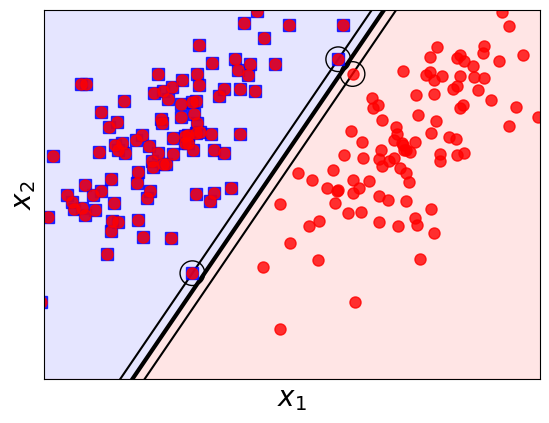

<ipython-input-10-90451aab5f67>:2: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages('./svm4hardmargin.pdf') as pdf:


In [10]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('./svm4hardmargin.pdf') as pdf:
  # draw
  # plot points
  fig, ax = plt.subplots()
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')
  y4 = 10*x1
  plt.plot(x1, y1, 'k')
  plt.fill_between(x1, y1, color='red', alpha=0.1)
  plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
  plt.axis('equal')
  plt.ylim(0, 3)
  plt.xlim(2, 4)
  # hide tikcs
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])
  # add circles around support vectors
  for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
  # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
  # pdf.savefig()
  plt.show()

In [11]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]
